In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#load csv's to dataframes
adv_df = pd.read_csv('advanced_stats.csv')
per_game_df = pd.read_csv('per_game_stats.csv')
stripped_pg_df = per_game_df.drop(columns=['Rk', 'Tm', 'Pos', 'G', 'MP'])
dataframe = adv_df.merge(stripped_pg_df, on = ['Player','Year'], how = 'outer')
dataframe.to_csv('all_stats.csv', index=False)

#globals
OWS_centers = []
OWS_pgs = []
OWS_sfs = []
OWS_pfs = []
OWS_sgs = []
years = []

DWS_centers = []
DWS_pgs = []
DWS_sgs = []
DWS_pfs = []
DWS_sfs = []

PA3_sgs = []
PA2_sgs = []
PA3_c = []
PA2_c = []

RB_c = []
RB_pf = []
RB_sf = []
RB_sg = []
RB_pg = []

In [2]:
mpl.rcParams['figure.figsize'] = (20,10)

#iterate dataframe and extract information for global
year = 1955
while year <= 2017:
    centers = dataframe[(dataframe['Year'] == year) & (dataframe['Pos'].str.contains('C'))]
    point_guards = dataframe[(dataframe['Year'] == year) & (dataframe['Pos'].str.contains('PG'))]
    shooting_guards = dataframe[(dataframe['Year'] == year) & (dataframe['Pos'].str.contains('SG'))]
    small_forwards = dataframe[(dataframe['Year'] == year) & (dataframe['Pos'].str.contains('SF'))]
    power_forwards = dataframe[(dataframe['Year'] == year) & (dataframe['Pos'].str.contains('PF'))]

    sample_size = 15
    rating = 'WS'
    
    #calulcate ast and ppg trends of top WS centers
    if(year > 1979):
        PA3_c.append(centers.nlargest(sample_size, rating)['3PA'].sum()/sample_size)
        PA2_c.append(centers.nlargest(sample_size, rating)['2PA'].sum()/sample_size) 
        
    if(year > 1979):
        PA3_sgs.append(shooting_guards.nlargest(sample_size, rating)['3PA'].sum()/sample_size)
        PA2_sgs.append(shooting_guards.nlargest(sample_size, rating)['2PA'].sum()/sample_size) 
    
    if(year > 1974):
        comparator = "PS/G"
        RB_c.append(centers.nlargest(sample_size, rating)[comparator].sum()/sample_size)
        RB_pf.append(power_forwards.nlargest(sample_size, rating)[comparator].sum()/sample_size)
        RB_sf.append(small_forwards.nlargest(sample_size, rating)[comparator].sum()/sample_size)
        RB_sg.append(shooting_guards.nlargest(sample_size, rating)[comparator].sum()/sample_size)
        RB_pg.append(point_guards.nlargest(sample_size, rating)[comparator].sum()/sample_size)
        
    
    top_centers = centers.nlargest(sample_size, rating)
    top_pgs = point_guards.nlargest(sample_size, rating)
    top_sgs = shooting_guards.nlargest(sample_size, rating)
    top_pfs = power_forwards.nlargest(sample_size, rating)
    top_sfs = small_forwards.nlargest(sample_size, rating)
    
    #calculate average OWS among top WS players 
    center_ave_OWS = top_centers['OWS'].sum()/sample_size
    shooting_guard_ave_OWS = top_sgs['OWS'].sum()/sample_size
    power_forward_ave_OWS = top_pfs['OWS'].sum()/sample_size
    small_forward_ave_OWS = top_sfs['OWS'].sum()/sample_size
    point_guard_ave_OWS = top_pgs['OWS'].sum()/sample_size
    OWS_centers.append(center_ave_OWS)
    OWS_pgs.append(point_guard_ave_OWS)
    OWS_sgs.append(shooting_guard_ave_OWS)
    OWS_sfs.append(small_forward_ave_OWS)
    OWS_pfs.append(power_forward_ave_OWS)
    

    #calculate average DWS among top WS players
    center_ave_DWS = top_centers['DWS'].sum()/sample_size
    shooting_guard_ave_DWS = top_sgs['DWS'].sum()/sample_size
    power_forward_ave_DWS = top_pfs['DWS'].sum()/sample_size
    small_forward_ave_DWS = top_sfs['DWS'].sum()/sample_size
    point_guard_ave_DWS = top_pgs['DWS'].sum()/sample_size
    DWS_centers.append(center_ave_DWS)
    DWS_pgs.append(point_guard_ave_DWS)
    DWS_sgs.append(shooting_guard_ave_DWS)
    DWS_sfs.append(small_forward_ave_DWS)
    DWS_pfs.append(power_forward_ave_DWS)
    
    years.append(year)
    year += 1



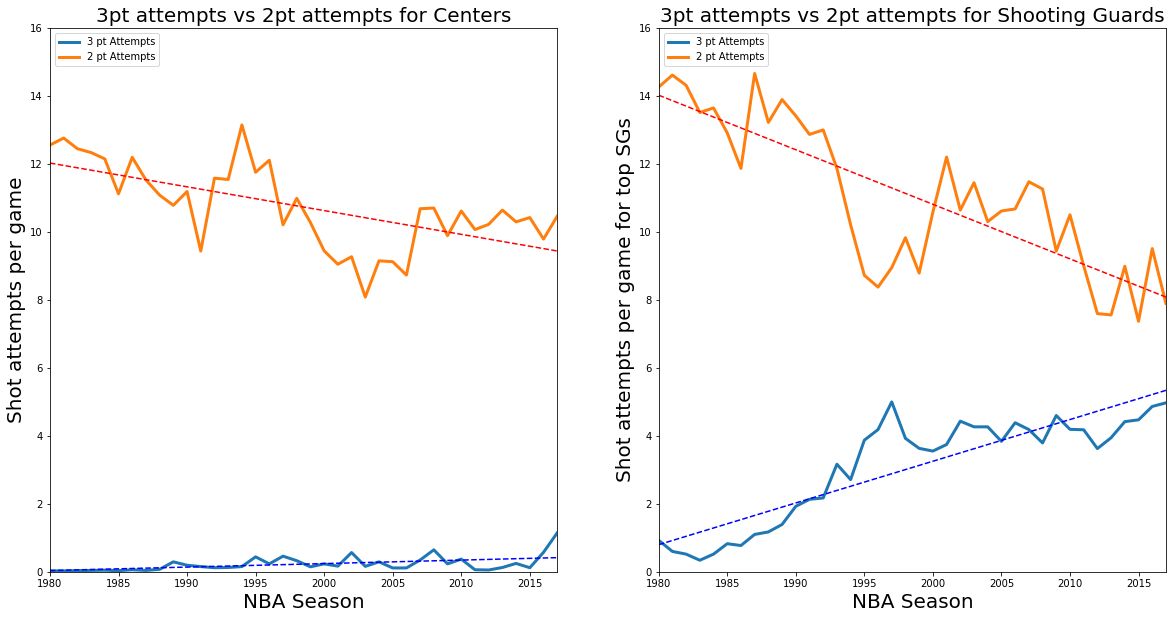

In [3]:
#plot year vs 3pa, 2pa trends among top centers
plt.subplot(1, 2, 1)
plt.axis([1980, 2017, 0, 16])
plt.title("3pt attempts vs 2pt attempts for Centers", fontsize=20)
plt.plot(years[-38:], PA3_c, label="3 pt Attempts", linewidth=3)
plt.plot(years[-38:], PA2_c, label="2 pt Attempts", linewidth=3)

z3 = np.polyfit(years[-38:], PA3_c, 1)
p3 = np.poly1d(z3)
plt.plot(years[-38:],p3(years[-38:]),"b--")

z2 = np.polyfit(years[-38:], PA2_c, 1)
p2 = np.poly1d(z2)
plt.plot(years[-38:],p2(years[-38:]),"r--")

plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Shot attempts per game", fontsize=20)
plt.legend(loc=2)

#plot year vs 3pa, 2pa trends among top guards
plt.subplot(1, 2, 2)
plt.title("3pt attempts vs 2pt attempts for Shooting Guards", fontsize=20)
plt.axis([1980, 2017, 0, 16])
plt.plot(years[-38:], PA3_sgs, label="3 pt Attempts", linewidth=3)
plt.plot(years[-38:], PA2_sgs, label="2 pt Attempts", linewidth=3)

z3 = np.polyfit(years[-38:], PA3_sgs, 1)
p3 = np.poly1d(z3)
plt.plot(years[-38:],p3(years[-38:]),"b--")

z2 = np.polyfit(years[-38:], PA2_sgs, 1)
p2 = np.poly1d(z2)
plt.plot(years[-38:],p2(years[-38:]),"r--")

plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Shot attempts per game for top SGs", fontsize=20)
plt.legend(loc=2)

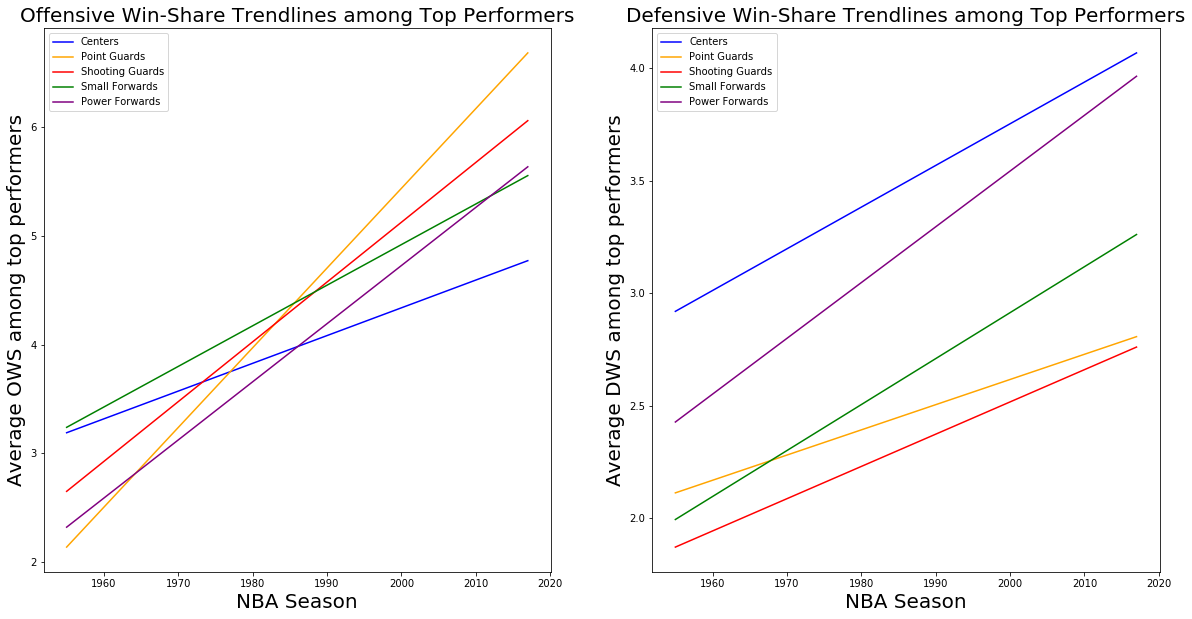

In [4]:
plt.subplot(1, 2, 1)
plt.title("Offensive Win-Share Trendlines among Top Performers", fontsize=20)

zc = np.polyfit(years, OWS_centers, 1)
pc = np.poly1d(zc)
plt.plot(years,pc(years),color="blue", label="Centers")

zpg = np.polyfit(years, OWS_pgs, 1)
ppg = np.poly1d(zpg)
plt.plot(years,ppg(years),color="orange", label="Point Guards")

zsg = np.polyfit(years, OWS_sgs, 1)
psg = np.poly1d(zsg)
plt.plot(years,psg(years),color="red", label="Shooting Guards")

zsf = np.polyfit(years, OWS_sfs, 1)
psf = np.poly1d(zsf)
plt.plot(years,psf(years),color="green", label="Small Forwards")

zpf = np.polyfit(years, OWS_pfs, 1)
ppf = np.poly1d(zpf)
plt.plot(years,ppf(years),color="purple", label="Power Forwards")


plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Average OWS among top performers", fontsize=20)
plt.legend(loc=2)

plt.subplot(1, 2, 2)
plt.title("Defensive Win-Share Trendlines among Top Performers", fontsize=20)

zc = np.polyfit(years, DWS_centers, 1)
pc = np.poly1d(zc)
plt.plot(years,pc(years),color="blue", label="Centers")

zpg = np.polyfit(years, DWS_pgs, 1)
ppg = np.poly1d(zpg)
plt.plot(years,ppg(years),color="orange", label="Point Guards")

zsg = np.polyfit(years, DWS_sgs, 1)
psg = np.poly1d(zsg)
plt.plot(years,psg(years),color="red", label="Shooting Guards")

zsf = np.polyfit(years, DWS_sfs, 1)
psf = np.poly1d(zsf)
plt.plot(years,psf(years),color="green", label="Small Forwards")

zpf = np.polyfit(years, DWS_pfs, 1)
ppf = np.poly1d(zpf)
plt.plot(years,ppf(years),color="purple", label="Power Forwards")


plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("Average DWS among top performers", fontsize=20)
plt.legend(loc=2)

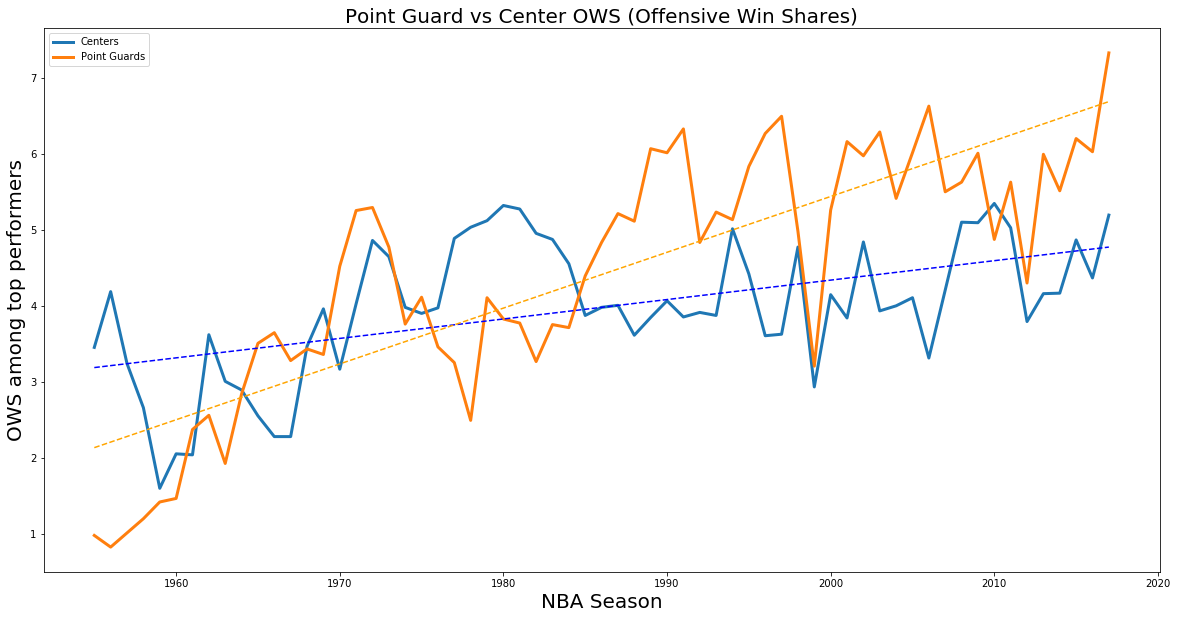

In [5]:
#plot year vs OWS among top players
plt.title("Point Guard vs Center OWS (Offensive Win Shares)", fontsize=20)

plt.plot(years, OWS_centers, label="Centers", linewidth=3)
plt.plot(years, OWS_pgs, label="Point Guards", linewidth=3)

zc = np.polyfit(years, OWS_centers, 1)
pc = np.poly1d(zc)
plt.plot(years,pc(years),"b--")

zpg = np.polyfit(years, OWS_pgs, 1)
ppg = np.poly1d(zpg)
plt.plot(years,ppg(years),"--", color="orange")

plt.xlabel("NBA Season", fontsize=20)
plt.ylabel("OWS among top performers", fontsize=20)
plt.legend(loc=2)

*Faded points are older seasons, opaque points are more recent seasons


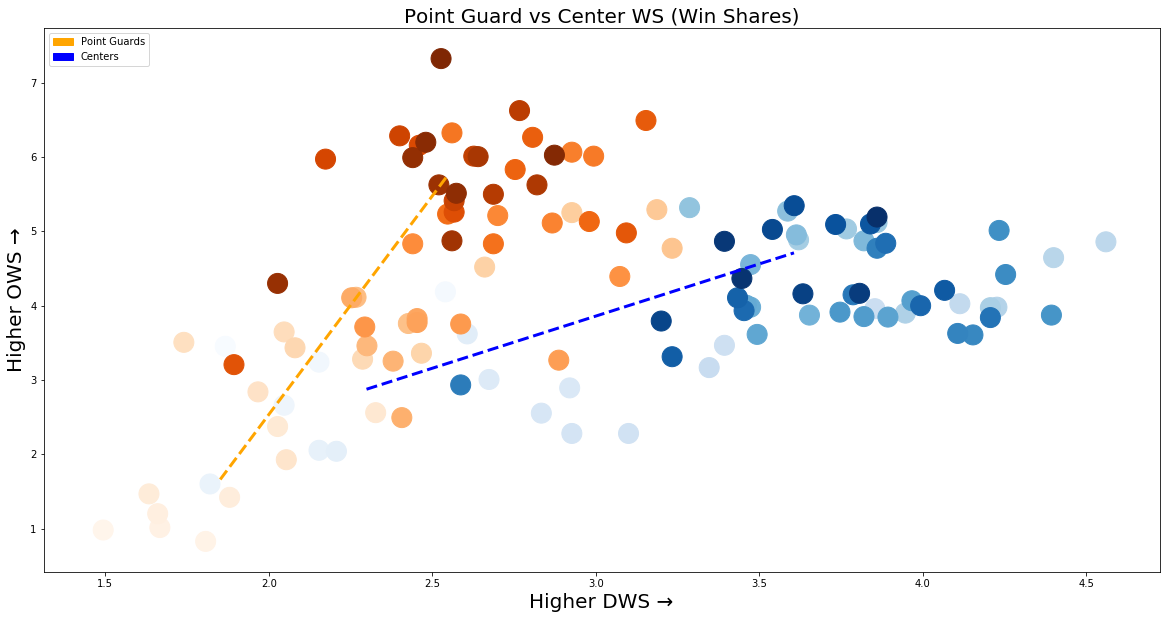

In [6]:
plt.title("Point Guard vs Center WS (Win Shares)", fontsize=20)

#plot DWS vs OWS among top performers
plt.scatter(DWS_centers, OWS_centers, s=400, cmap="Blues", c=years, label="Centers")
plt.scatter(DWS_pgs,OWS_pgs, s=400, cmap="Oranges", c=years, label="Point Guards")
plt.xlabel("Higher DWS →", fontsize=20)
plt.ylabel("Higher OWS →", fontsize=20)

#simple trendlines
c_x1 = sum(DWS_centers[:10])/10 #first 10
c_y1 = sum(OWS_centers[:10])/10
c_x2 = sum(DWS_centers[-10:])/10 #last 10
c_y2 = sum(OWS_centers[-10:])/10

pg_x1 = sum(DWS_pgs[:10])/10
pg_y1 = sum(OWS_pgs[:10])/10
pg_x2 = sum(DWS_pgs[-10:])/10
pg_y2 = sum(OWS_pgs[-10:])/10

plt.plot([c_x1, c_x2], [c_y1, c_y2], '--', color="blue", linewidth=3)
plt.plot([pg_x1, pg_x2], [pg_y1, pg_y2], '--', color="orange", linewidth=3)

#create legend
orange_patch = mpatches.Patch(color='orange', label='Point Guards')
blue_patch = mpatches.Patch(color='blue', label='Centers')
plt.legend(handles=[orange_patch, blue_patch], loc=2)

print("*Faded points are older seasons, opaque points are more recent seasons")


In [3]:
from sklearn.feature_selection import VarianceThreshold
#create dataset for 2000-2016
dataset = dataframe[(dataframe['Year'] <= 2016) & (dataframe['Year'] >= 2000)& ~(dataframe['Year'] == 2012) & ~(dataframe['Pos'].str.contains('-')) & (dataframe['MP'] > 10)].drop(columns=['Rk','Age▼','Age','Tm','G','MP','Year','TOV','GS','PER']).dropna(axis=1, how='any')
labels = dataset['Pos']
dataset = dataset.drop(columns=['Pos','Player'])
testing_df = dataframe[(dataframe['Year'] == 2017) & (dataframe['MP'] > 10) & ~(dataframe['Pos'].str.contains('-'))].drop(columns=['TS%','3PAr','FTr','Rk','Age▼','Age', 'Tm', 'G', 'MP','Year','TOV%','TOV','FG%', '2P%','eFG%','GS','PER']).dropna(axis=1, how='any')

dataset_past = dataframe[(dataframe['Year'] <= 1998) & (dataframe['Year'] >= 1983) & ~(dataframe['Pos'].str.contains('-')) & (dataframe['MP'] > 10)].drop(columns=['Rk','Age▼','Age','Tm','G','TOV%','MP','Year','TOV','GS','PER']).dropna(axis=1, how='any')
labels_past = dataset_past['Pos']
dataset_past = dataset_past.drop(columns=['Pos','Player'])
testing_df_past = dataframe[(dataframe['Year'] == 1982) & (dataframe['MP'] > 10) & ~(dataframe['Pos'].str.contains('-'))].drop(columns=['TS%','3PAr','FTr','Rk','Age▼','Age', 'Tm', 'G', 'MP','Year','TOV%','FG%', '2P%','eFG%','TOV','GS','PER']).dropna(axis=1, how='any')

#Reasoning: Choose two same-sized time periods (15 yrs) not including 1999 and 2012 seasons (lockout)
#There are other lockout seasons, but only '99 and '12 caused less regular-season games

#scale training/testing set and remove features that don't vary enough
scalar = preprocessing.StandardScaler().fit(pd.concat([dataset,dataset_past]))
sel = VarianceThreshold(threshold=(0.9))

#remove features that don't vary enough from dataset
scaled_train = sel.fit_transform(scalar.transform(dataset))
remaining_features = sel.get_support(indices = True)
scaled_test = scalar.transform(testing_df.drop(columns=['Pos','Player']))[:,remaining_features]
test_labels = testing_df['Pos']

#remove features that don't vary enough from past dataset
scaled_train_past = scalar.transform(dataset_past)[:,remaining_features]
scaled_test_past = scalar.transform(testing_df_past.drop(columns=['Pos','Player']))[:,remaining_features]
test_labels_past = testing_df_past['Pos']

In [173]:
#classify players across models
classification2 = SVC(C=10, gamma=0.01, probability=True)
classification2.fit(scaled_train, labels)
classification2_past = SVC(C=10, gamma=0.01, probability=True)
classification2_past.fit(scaled_train_past, labels_past)

print("Current players classified by current model correctness: ", 100 * classification2.score(scaled_test, test_labels), '%')
print("Past players classified by past model correctness: ", 100 * classification2_past.score(scaled_test_past, test_labels_past), '%')
print("\nCurrent players classified by past model correctness: ", 100 * classification2_past.score(scaled_test, test_labels), '%')
print("Past players classified by current model correctness: ", 100 * classification2.score(scaled_test_past, test_labels_past), '%')
       

Current players classified by current model correctness:  65.0 %
Past players classified by past model correctness:  64.85623003194888 %

Current players classified by past model correctness:  60.62499999999999 %
Past players classified by current model correctness:  59.424920127795524 %


In [175]:
#### find interesting players and see if they differ in classification
player = dataframe[(dataframe['Player'].str.contains("DeMar DeRozan")) & (dataframe['Year'] == 2017)].drop(columns=['3P%','FT%','Pos','Player','TS%','3PAr','FTr','Rk','Age▼','Age', 'Tm', 'G', 'MP','Year','TOV%','FG%', '2P%','eFG%','TOV','PER','GS']).dropna(axis=1, how='any')
print(classification2.classes_)
print(classification2.predict_proba(scalar.transform(player)[:,remaining_features]))
print(classification2_past.predict_proba(scalar.transform(player)[:,remaining_features]))

['C' 'PF' 'PG' 'SF' 'SG']
[[0.03962845 0.0739398  0.01838358 0.33434725 0.53370092]]
[[0.03082062 0.16034367 0.0304962  0.65800548 0.12033403]]


In [4]:
print("===Linear Kernel===")
#parametersSVC={
#    'C': [0.025,0.05,0.075]
#}
#classification10 = GridSearchCV(SVC(kernel='linear'),param_grid=parametersSVC,n_jobs=-1,verbose=2,cv=5)
#classification10.fit(scaled_train, labels)
#print(classification10.best_params_)
#print(classification10.best_score_)
classification10 = SVC(kernel='linear',C=0.1)
classification10.fit(scaled_train, labels)
print("Current players classified by current model correctness: ", 100 * classification10.score(scaled_test, test_labels), '%')


===Linear Kernel===
Current players classified by current model correctness:  64.375 %


In [5]:
#get the list of support vectors, average all 1vs1 weights to create weights per position
c = classification10.coef_
center_weights = 100*(c[0]+c[1]+c[2]+c[3])/4
pforward_weights = 100*(c[0]+c[4]-c[5]-c[6])/4
sforward_weights = 100*(-c[2]-c[5]-c[7]+c[9])/4
sguard_weights = 100*(-c[3]-c[6]-c[8]-c[9])/4
pguard_weights = 100*(-c[1]-c[4]+c[7]+c[8])/4

print(".::Centers::.\n")
for i in range(0,len(center_weights)-1):
    print(str(dataset.columns.values[i]) + " : " + str(center_weights[i]))
print("\n.::Power Forwards::.\n")
for i in range(0,len(pforward_weights)-1):
    print(str(dataset.columns.values[i]) + " : " + str(pforward_weights[i]))
print("\n.::Small Forwards::.\n")
for i in range(0,len(sforward_weights)-1):
    print(str(dataset.columns.values[i]) + " : " + str(sforward_weights[i]))
print("\n.::Shooting Guards::.\n")
for i in range(0,len(sguard_weights)-1):
    print(str(dataset.columns.values[i]) + " : " + str(sguard_weights[i]))
print("\n.::Point Guards::.\n")
for i in range(0,len(pguard_weights)-1):
    print(str(dataset.columns.values[i]) + " : " + str(pguard_weights[i]))

#print out order of 1vs1 support vectors
#classes = {0:'C',1:'PF',2:'PG',3:'SF',4:'SG'}
#for x in range (0,len(classification10.classes_)):
#    for y in range(x+1, len(classification10.classes_)):
#        print(classes[x] + '-' + classes[y])


.::Centers::.

ORB% : 47.81454162062112
DRB% : 32.402871831512286
TRB% : 44.794302864941606
AST% : -11.37003813946251
STL% : 83.51611068563054
BLK% : -33.780753364488824
USG% : 32.47928074738557
OWS : -1.429832666296993
DWS : 19.79041941304367
WS : 31.991630444191422
WS/48 : -38.37511883319629
OBPM : -24.997405351694464
DBPM : -44.89202425005092
BPM : -35.11128210731087
VORP : -34.58167320625446
FG : 31.268186277570315
FGA : -67.11415471297256
3P : 0.881652573839431
3PA : -9.594155797942339
2P : 26.16228139188269
2PA : 9.836827765945355

.::Power Forwards::.

ORB% : -19.315739088751787
DRB% : -6.279816710571101
TRB% : -19.879491910185198
AST% : -23.394436584909293
STL% : 8.021298007184935
BLK% : -3.1154463964061296
USG% : -1.311559066429524
OWS : -7.593511369800576
DWS : -7.371853916808169
WS : -8.973689109977311
WS/48 : 2.958526255690941
OBPM : 9.044689788905611
DBPM : 3.9441162870971547
BPM : 13.05499589606906
VORP : -14.490649311971593
FG : 9.03108223053617
FGA : -21.043446974060377

In [9]:
print("\n===LinearSVC===")
from sklearn.svm import LinearSVC
#parameters_lin={
#    'C': [0.08,0.8,0.1,0.11],
#    'penalty': ['l2'],
#    'tol':[1e-3,2e-3,3e-3,4e-3,5e-3,6e-3,7e-3],
#    'dual':[False]
#}
#classification1 = GridSearchCV(estimator=LinearSVC(),param_grid=parameters_lin,n_jobs=-1,verbose=1,cv=5)
#classification1.fit(scaled_train, labels)
#print(classification1.best_params_)
#print(classification1.best_score_)
classification1 = LinearSVC(C=1,tol=1e-4,dual=False,penalty='l2')
classification1.fit(scaled_train, labels)
print(classification1.score(scaled_test, test_labels))

classification1_past = LinearSVC(C=1,tol=1e-4,dual=False,penalty='l2')
classification1_past.fit(scaled_train_past, labels_past)
print(classification1_past.score(scaled_test_past, test_labels_past))


===LinearSVC===
0.6125
0.6198083067092651


In [47]:
#prints a nested list [[1,2,3],[4,5,6],...] in a tabular format
def pretty_print_table(tbl):
    s = [[str(e) for e in row] for row in tbl]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print ('\n'.join(table))
    
#returns top 5 items of a nested list (key is index2 - index3) [[1,2,3],[4,5,6],...]
def print_top5(listing):
    top5 = {}
    for stat, modern, past in listing:
        if stat == 'Stat':
            continue
        change = float(modern) - float(past)
        if len(top5) != 10:
            top5[stat] = change
        else:
            min_stat = min(top5.items(), key=lambda x: x[1])
            if abs(change) > abs(min_stat[1]):
                del top5[min_stat[0]]
                top5[stat] = change
    return top5

    
c = 100*classification1.coef_
center_weights = c[0]
pforward_weights = c[1]
sforward_weights = c[2]
sguard_weights = c[3]
pguard_weights = c[4]

c2 = 100*classification1_past.coef_
center_weights2 = c2[0]
pforward_weights2 = c2[1]
sforward_weights2 = c2[2]
sguard_weights2 = c2[3]
pguard_weights2 = c2[4]

center_list = [["Stat", "Modern Importance", "Past Importance"]]
pforward_list = [["Stat", "Modern Importance", "Past Importance"]]
sforward_list = [["Stat", "Modern Importance", "Past Importance"]]
sguard_list = [["Stat", "Modern Importance", "Past Importance"]]
pguard_list = [["Stat", "Modern Importance", "Past Importance"]]

center_top5_changes = {}
pforward_top5_changes = {}
sforward_top5_changes = {}
sguard_top5_changes = {}
pgaurd_top5_changes = {}

for i in range(0,len(center_weights)):
    center_list.append([str(dataset.columns.values[i]),str(center_weights[i]),str(center_weights2[i])])
for i in range(0,len(pforward_weights)):
    pforward_list.append([str(dataset.columns.values[i]),str(pforward_weights[i]),str(pforward_weights2[i])])
for i in range(0,len(sforward_weights)):
    sforward_list.append([str(dataset.columns.values[i]),str(sforward_weights[i]),str(sforward_weights2[i])])
for i in range(0,len(sguard_weights)):
    sguard_list.append([str(dataset.columns.values[i]),str(sguard_weights[i]),str(sguard_weights2[i])])
for i in range(0,len(pguard_weights)):
    pguard_list.append([str(dataset.columns.values[i]),str(pguard_weights[i]),str(pguard_weights2[i])])
    
print(".::Centers::.")
pretty_print_table(center_list)
print(print_top5(center_list))
print("\n.::Power Forwards::.")
pretty_print_table(pforward_list)
print(print_top5(pforward_list))
print("\n.::Small Forwards::.")
pretty_print_table(sforward_list)
print(print_top5(sforward_list))
print("\n.::Shooting Guards::.")
pretty_print_table(sguard_list)
print(print_top5(sguard_list))
print("\n.::Point Guards::.")
pretty_print_table(pguard_list)
print(print_top5(pguard_list))

.::Centers::.
Stat 	Modern Importance  	Past Importance    
ORB% 	4.341651627831414  	46.538594806087374 
DRB% 	2.0111493431579106 	76.34540779674617  
TRB% 	14.934163955918015 	-81.54734515527475 
AST% 	-3.9949611181014872	-8.581554072819673 
STL% 	30.389119102434364 	41.02796597052061  
BLK% 	-9.624794443798205 	-17.77220469161314 
USG% 	26.459228405377505 	-13.712696032906436
OWS  	20.730657035412758 	4.536909781355045  
DWS  	-39.586127572454885	20.861686876535085 
WS   	1.4632467841946644 	-19.606007529522877
WS/48	5.848340355040187  	22.87386775718995  
OBPM 	8.860714218600565  	-11.922757926983612
DBPM 	-31.29109507424349 	-6.917164857164074 
BPM  	-16.1336546995049  	-18.01100202259101 
VORP 	-110.08885589122417	-43.07000792316675 
FG   	51.68443190384527  	101.5348398402271  
FGA  	-76.72926325954685 	-149.5013499115547 
3P   	-1.2469074748405844	1.365160378459637  
3PA  	-24.742883981360897	-4.481736350462691 
2P   	-5.935606611533768 	89.89572585453858  
2PA  	20.17455982724

In [61]:
print("\n===kNN===")
#parametersKNN={
#'n_neighbors': np.arange(1,200,2)
#}
#classification3 = GridSearchCV(estimator=KNeighborsClassifier(10),param_grid=parametersKNN,n_jobs=-1,verbose=2,cv=10)
#print(classification7.best_params_)
#print(classification7.best_score_)
classification3 = KNeighborsClassifier(5)
classification3.fit(scaled_train, labels)
print(classification3.score(scaled_test, test_labels))

print("\n===Random Forests===")
#parametersRF={
#    'n_estimators': np.arange(30,300,5)
#}
#classification9 = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=parametersRF,n_jobs=-1,verbose=1,cv=10)
#classification9.fit(scaled_train, labels)
classification11 = RandomForestClassifier(n_estimators=130)
classification11.fit(scaled_train, labels)
print(classification11.score(scaled_test, test_labels))

print("\n===MLP NN===")
#parameters={
#'learning_rate': ["constant", "invscaling", "adaptive"],
#'hidden_layer_sizes': [(100,100,100,100),(200,100,100,100),(200,200,100,100)],
#'alpha': [10.0 ** -3],
#'activation': ["logistic", "relu", "tanh"]
#}
#classification4 = GridSearchCV(estimator=MLPClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=10)
classification6 = MLPClassifier(learning_rate='adaptive',hidden_layer_sizes= (200, 100, 100, 100))
classification6.fit(scaled_train, labels)
print(classification6.score(scaled_test, test_labels))

print("\n===NuSVC===")
from sklearn.svm import NuSVC
#parameters_NuSVC={
#'degree': [2,3,4,5],
#'gamma': [0.0001,0.001,0.01,0.1],
#'kernel': ['poly']
#}
#returns {'kernel': 'poly', 'gamma': 0.01, 'degree': 2}
#best score: 0.641904507868765
#classification7 = GridSearchCV(estimator=NuSVC(),param_grid=parameters_NuSVC,n_jobs=-1,verbose=2,cv=5)
#print(classification7.best_params_)
#print(classification7.best_score_)
classification7 = NuSVC(kernel = 'poly', gamma = 0.01, degree = 2)
classification7.fit(scaled_train, labels)
print(classification7.score(scaled_test, test_labels))

print("\n===rbf SVM===")
#parametersRBF={
#'C': [0.1,1,10,100,1000],
#'gamma': [0.0001,0.001,0.01,0.1,1]
#}
#classification2 = GridSearchCV(estimator=SVC(),param_grid=parametersRBF,n_jobs=-1,verbose=2,cv=5,scoring='accuracy')
classification2 = SVC(C=500,gamma=0.01)
classification2.fit(scaled_train, labels)
#print(classification2.best_params_)
#print(classification2.best_score_)
#classification2.fit(scaled_train_past, labels_past)
print(classification2.score(scaled_test, test_labels))


===kNN===
0.61875

===LinearSVC===
0.525

===MLP NN===
0.6229166666666667

===NuSVC===
0.6020833333333333

===rbf SVM===
0.6625
